<font size="6"><center>**Final project - Binary classification**</center></font>

<font size="4"><center>**Aluma Kasher, 203666300**</center></font>


<font size="4"><div style="text-align: left">**Project Libraries**</div></font>

In [176]:
import numpy as np
from numpy import interp
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import cluster, datasets
import seaborn as sns

<font size="4"><div style="text-align: left">**Loading & Showing data**</div></font>

In [177]:
feature_data = pd.read_csv("./feature_data.csv", index_col=0)
feature_data = feature_data.reset_index()
feature_data = pd.DataFrame(data = feature_data)
feature_data


,index,time_until_order,order_year,order_month,order_week,order_day_of_month,adults,children,babies,country,...,anon_feat_4,anon_feat_5,anon_feat_6,anon_feat_7,anon_feat_8,anon_feat_9,anon_feat_10,anon_feat_11,anon_feat_12,anon_feat_13
0,51014,309.0,2016,May,week_20,13,2,0.0,0,PRT,...,0,0.0,215.0,0.0,0,0.0,0.250606,17.588299,True,1.0
1,28536,3.0,2016,October,week_41,2,2,0.0,0,ESP,...,0,3.0,0.0,1.0,1,1.0,0.444719,2.343371,True,NaN
2,21745,NaN,2017,March,week_12,19,1,0.0,0,DEU,...,4,4.0,0.0,0.0,0,1.0,0.598733,2.498820,True,NaN
3,17502,153.0,2015,September,week_40,29,2,0.0,0,GBR,...,3,3.0,0.0,0.0,0,1.0,0.335675,12.411559,True,NaN
4,83295,33.0,2016,January,week_5,25,2,0.0,0,BRA,...,0,0.0,15.0,0.0,0,0.0,0.492874,5.743378,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89537,112553,21.0,2017,May,week_21,21,2,0.0,0,CHE,...,0,0.0,0.0,0.0,1,0.0,0.321296,4.663834,True,NaN
89538,87372,90.0,2016,April,week_16,14,2,0.0,0,DEU,...,0,0.0,0.0,0.0,1,0.0,0.398224,9.486275,False,NaN
89539,16490,39.0,2015,August,week_35,23,1,0.0,0,PRT,...,0,0.0,0.0,0.0,1,1.0,0.387626,6.245419,False,NaN
89540,1185,110.0,2015,NaN,week_34,17,2,0.0,0,PRT,...,0,0.0,0.0,0.0,1,1.0,0.323147,10.411280,True,NaN


# Exploration of the Dataset
<a id= 'explore'></a>

To explore the data, first I will merge the feature data frame with the label data frame. 

In [178]:
#load label_data.csv:
label = pd.read_csv("./label_data.csv",index_col=0)
label = pd.DataFrame(data=label)

#convert column to list
cancelation_list = label['cancelation'].tolist()
#add list as column to feature_data
feature_data['cancelation'] = cancelation_list
#convert cancelation to numeric
feature_data['cancelation'] = feature_data['cancelation'].astype(int)


feature_data

,index,time_until_order,order_year,order_month,order_week,order_day_of_month,adults,children,babies,country,...,anon_feat_5,anon_feat_6,anon_feat_7,anon_feat_8,anon_feat_9,anon_feat_10,anon_feat_11,anon_feat_12,anon_feat_13,cancelation
0,51014,309.0,2016,May,week_20,13,2,0.0,0,PRT,...,0.0,215.0,0.0,0,0.0,0.250606,17.588299,True,1.0,1
1,28536,3.0,2016,October,week_41,2,2,0.0,0,ESP,...,3.0,0.0,1.0,1,1.0,0.444719,2.343371,True,NaN,0
2,21745,NaN,2017,March,week_12,19,1,0.0,0,DEU,...,4.0,0.0,0.0,0,1.0,0.598733,2.498820,True,NaN,0
3,17502,153.0,2015,September,week_40,29,2,0.0,0,GBR,...,3.0,0.0,0.0,0,1.0,0.335675,12.411559,True,NaN,0
4,83295,33.0,2016,January,week_5,25,2,0.0,0,BRA,...,0.0,15.0,0.0,0,0.0,0.492874,5.743378,True,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89537,112553,21.0,2017,May,week_21,21,2,0.0,0,CHE,...,0.0,0.0,0.0,1,0.0,0.321296,4.663834,True,NaN,0
89538,87372,90.0,2016,April,week_16,14,2,0.0,0,DEU,...,0.0,0.0,0.0,1,0.0,0.398224,9.486275,False,NaN,0
89539,16490,39.0,2015,August,week_35,23,1,0.0,0,PRT,...,0.0,0.0,0.0,1,1.0,0.387626,6.245419,False,NaN,0
89540,1185,110.0,2015,NaN,week_34,17,2,0.0,0,PRT,...,0.0,0.0,0.0,1,1.0,0.323147,10.411280,True,NaN,1


## Filling Missing Values
<a id= 'missing'></a>

In [179]:
#finding percentage of missing values for each feature
missing_values = round((feature_data.isnull().sum() * 100/ len(feature_data)),2).sort_values(ascending=False)

print(missing_values)

company                94.35
anon_feat_13           93.55
time_until_order       14.16
agent                  13.62
customer_type          11.05
deposit_type           10.06
anon_feat_11            5.54
country                 4.85
anon_feat_7             4.74
anon_feat_6             4.73
anon_feat_5             4.50
anon_feat_9             4.17
changes                 3.88
order_month             3.84
anon_feat_0             3.78
adr                     3.33
anon_feat_10            3.05
anon_feat_8             0.00
anon_feat_2             0.00
anon_feat_4             0.00
anon_feat_12            0.00
anon_feat_3             0.00
index                   0.00
anon_feat_1             0.00
prev_not_canceled       0.00
prev_canceled           0.00
acquisition_channel     0.00
order_type              0.00
babies                  0.00
children                0.00
adults                  0.00
order_day_of_month      0.00
order_week              0.00
order_year              0.00
cancelation   

As we can see, the features company and anon_feat_13 have extremley high percentage of missing values. The best way to deal with it is to drop those features from the dataset. 

In [180]:
#drop features with high percentage of missing values from the data:
feature_data = feature_data.drop(['company','anon_feat_13'],axis=1)

feature_data

,index,time_until_order,order_year,order_month,order_week,order_day_of_month,adults,children,babies,country,...,anon_feat_4,anon_feat_5,anon_feat_6,anon_feat_7,anon_feat_8,anon_feat_9,anon_feat_10,anon_feat_11,anon_feat_12,cancelation
0,51014,309.0,2016,May,week_20,13,2,0.0,0,PRT,...,0,0.0,215.0,0.0,0,0.0,0.250606,17.588299,True,1
1,28536,3.0,2016,October,week_41,2,2,0.0,0,ESP,...,0,3.0,0.0,1.0,1,1.0,0.444719,2.343371,True,0
2,21745,NaN,2017,March,week_12,19,1,0.0,0,DEU,...,4,4.0,0.0,0.0,0,1.0,0.598733,2.498820,True,0
3,17502,153.0,2015,September,week_40,29,2,0.0,0,GBR,...,3,3.0,0.0,0.0,0,1.0,0.335675,12.411559,True,0
4,83295,33.0,2016,January,week_5,25,2,0.0,0,BRA,...,0,0.0,15.0,0.0,0,0.0,0.492874,5.743378,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89537,112553,21.0,2017,May,week_21,21,2,0.0,0,CHE,...,0,0.0,0.0,0.0,1,0.0,0.321296,4.663834,True,0
89538,87372,90.0,2016,April,week_16,14,2,0.0,0,DEU,...,0,0.0,0.0,0.0,1,0.0,0.398224,9.486275,False,0
89539,16490,39.0,2015,August,week_35,23,1,0.0,0,PRT,...,0,0.0,0.0,0.0,1,1.0,0.387626,6.245419,False,0
89540,1185,110.0,2015,NaN,week_34,17,2,0.0,0,PRT,...,0,0.0,0.0,0.0,1,1.0,0.323147,10.411280,True,1


As for the other features, I will fill those missing values as follow:

In [181]:
#Filling missing values with the mean of the column for numeric values:
feature_data = feature_data.fillna(feature_data.mean())

#Filling missing values with the most frequent value in features that don't contain numbers:
object_column = feature_data.select_dtypes(include = object).columns.tolist()
for column in object_column:
    feature_data[column].fillna(feature_data[column].value_counts().idxmax(), inplace=True)

#let's make sure that now we don't have missing values in our data:
feature_data.isnull().sum()

index                  0
time_until_order       0
order_year             0
order_month            0
order_week             0
order_day_of_month     0
adults                 0
children               0
babies                 0
country                0
order_type             0
acquisition_channel    0
prev_canceled          0
prev_not_canceled      0
changes                0
deposit_type           0
agent                  0
customer_type          0
adr                    0
anon_feat_0            0
anon_feat_1            0
anon_feat_2            0
anon_feat_3            0
anon_feat_4            0
anon_feat_5            0
anon_feat_6            0
anon_feat_7            0
anon_feat_8            0
anon_feat_9            0
anon_feat_10           0
anon_feat_11           0
anon_feat_12           0
cancelation            0
dtype: int64

## convert alphabetic values to numeric values
<a id= 'numeric'></a>

In [182]:
# anon_feat_12
feature_data['anon_feat_12'] = feature_data['anon_feat_12'].astype(int)

#deposit_type
feature_data['deposit_type'] = feature_data['deposit_type'].replace(['No Deposit','Non Refund','Refundable'],
         [1,2,3])

#order_week
feature_data['order_week'] = feature_data['order_week'].replace(['week_20', 'week_41', 'week_12', 'week_40', 'week_5', 'week_19',
       'week_11', 'week_33', 'week_44', 'week_39', 'week_13', 'week_25',
       'week_10', 'week_15', 'week_7', 'week_18', 'week_35', 'week_49',
       'week_16', 'week_42', 'week_29', 'week_52', 'week_28', 'week_38',
       'week_21', 'week_3', 'week_26', 'week_8', 'week_50', 'week_23',
       'week_47', 'week_6', 'week_43', 'week_31', 'week_30', 'week_37',
       'week_45', 'week_14', 'week_27', 'week_34', 'week_53', 'week_32',
       'week_24', 'week_4', 'week_36', 'week_46', 'week_17', 'week_9',
       'week_48', 'week_1', 'week_22', 'week_51', 'week_2'],
           [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
            ,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53])

#order_month
feature_data['order_month'] = feature_data['order_month'].replace(['January','February', 'March','April','May', 'June','July' , 'August',
       'September', 'October', 'November', 'December'],
           [1,2,3,4,5,6,7,8,9,10,11,12])

#country
feature_data['country']= feature_data['country'].replace(['PRT', 'ESP', 'DEU', 'GBR', 'BRA', 'AGO', 'ISR', 'FRA', 'TUR',
      'ITA', 'CN', 'HUN', 'IRL', 'EST', 'CHN', 'USA', 'POL', 'NOR',
     'AUT', 'NLD', 'CIV', 'DNK', 'AUS', 'RUS', 'BEL', 'CZE', 'CMR',
      'CHE', 'MOZ', 'IDN', 'FIN', 'ROU', 'TJK', 'SWE', 'LUX', 'HRV',
       'QAT', 'TUN', 'GRC', 'LBN', 'KOR', 'LKA', 'MAR', 'TWN', 'ZAF',
       'IND', 'DZA', 'BGR', 'JPN', 'ARE', 'IRN', 'CYP', 'STP', 'MEX',
       'SVK', 'BLR', 'SRB', 'EGY', 'GHA', 'NZL', 'PRI', 'ECU', 'THA',
       'ARG', 'PHL', 'JOR', 'LTU', 'COL', 'URY', 'ISL', 'MAC', 'MKD',
       'UKR', 'SVN', 'ALB', 'SAU', 'KWT', 'SEN', 'SGP', 'AND', 'KAZ',
       'GEO', 'OMN', 'MDV', 'AZE', 'PER', 'DOM', 'NGA', 'ASM', 'CHL',
       'CAF', 'MYS', 'CRI', 'PAK', 'VEN', 'BHR', 'KEN', 'CPV', 'JEY',
       'LVA', 'GLP', 'MUS', 'MCO', 'MNE', 'HKG', 'BGD', 'CUB', 'GIB',
       'BRB', 'IRQ', 'GNB', 'PAN', 'SUR', 'LAO', 'FRO', 'BFA', 'MLT',
       'PLW', 'IMN', 'VNM', 'BOL', 'LCA', 'ARM', 'GAB', 'TGO', 'TZA',
       'PRY', 'GTM', 'ATF', 'ZMB', 'BIH', 'MYT', 'LBY', 'ABW', 'PYF',
       'SMR', 'COM', 'NIC', 'JAM', 'LIE', 'MRT', 'ATA', 'KHM', 'UMI',
       'SYC', 'GGY', 'GUY', 'SYR', 'UGA', 'VGB', 'TMP', 'MDG', 'MWI',
       'BEN', 'BDI', 'NAM', 'ZWE', 'SLE', 'HND', 'FJI', 'KNA', 'BWA',
      'SDN'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,
55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89, 90,91,92,
93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,
 126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,
 156,157,158,159,160,161,162,163])

#customer_type
feature_data['customer_type'] = feature_data['customer_type'].replace(['Transient-Party', 'Transient', 'Contract', 'Group'],
          [1,2,3,4])

#acquisition_channel
feature_data['acquisition_channel'] = feature_data['acquisition_channel'].replace(['TA/TO', 'Direct', 'Corporate', 'GDS', 'Undefined'],
         [1,2,3,4,5])

#order_type
feature_data['order_type'] = feature_data['order_type'].replace(['Offline TA/TO', 'Online TA', 'Direct', 'Corporate', 'Groups',
       'Aviation', 'Complementary', 'Undefined'],
        [1,2,3,4,5,6,7,8])

#Replacing value "unknown" with NaN:
feature_data.replace(r'\N', np.nan, inplace = True)

#I did not use dummy variabales evntually because they caused problems in the code that I could not fix.
#feature_data = pd.get_dummies(feature_data,columns = ['acquisition_channel', 'customer_type','deposit_type','order_type'])


feature_data

,index,time_until_order,order_year,order_month,order_week,order_day_of_month,adults,children,babies,country,...,anon_feat_4,anon_feat_5,anon_feat_6,anon_feat_7,anon_feat_8,anon_feat_9,anon_feat_10,anon_feat_11,anon_feat_12,cancelation
0,51014,309.000000,2016,5,1,13,2,0.0,0,1,...,0,0.0,215.0,0.0,0,0.0,0.250606,17.588299,1,1
1,28536,3.000000,2016,10,2,2,2,0.0,0,2,...,0,3.0,0.0,1.0,1,1.0,0.444719,2.343371,1,0
2,21745,103.673879,2017,3,3,19,1,0.0,0,3,...,4,4.0,0.0,0.0,0,1.0,0.598733,2.498820,1,0
3,17502,153.000000,2015,9,4,29,2,0.0,0,4,...,3,3.0,0.0,0.0,0,1.0,0.335675,12.411559,1,0
4,83295,33.000000,2016,1,5,25,2,0.0,0,5,...,0,0.0,15.0,0.0,0,0.0,0.492874,5.743378,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89537,112553,21.000000,2017,5,25,21,2,0.0,0,28,...,0,0.0,0.0,0.0,1,0.0,0.321296,4.663834,1,0
89538,87372,90.000000,2016,4,19,14,2,0.0,0,3,...,0,0.0,0.0,0.0,1,0.0,0.398224,9.486275,0,0
89539,16490,39.000000,2015,8,17,23,1,0.0,0,1,...,0,0.0,0.0,0.0,1,1.0,0.387626,6.245419,0,0
89540,1185,110.000000,2015,8,40,17,2,0.0,0,1,...,0,0.0,0.0,0.0,1,1.0,0.323147,10.411280,1,1


In [94]:
#An unsuccessful attempt to turn the country feature into a binary feature by taking the 10 most frequent countries and if a country is in it return 1 and if not return 0
#n = 10
#top10=feature_data['country'].value_counts()[:n].index.tolist()
#print(top10)

#feature_data[feature_data.country.isin(top10)]
#feature_data['country'].loc[(feature_data['country'] in top10)] = 1
#feature_data['country'].loc[(feature_data['country'] not in top10)] = 0

## Visualization
<a id= 'visual'></a>

Now I will make a boxplot for each feature, to show it's relationship with the label:

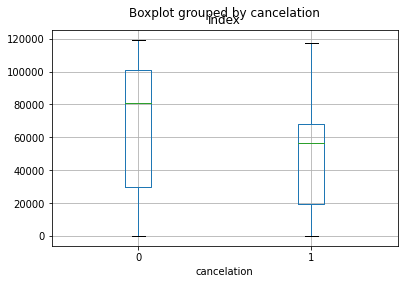

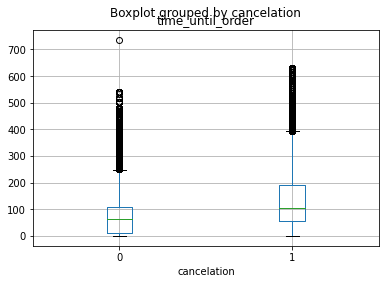

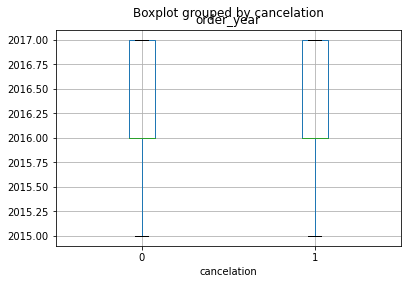

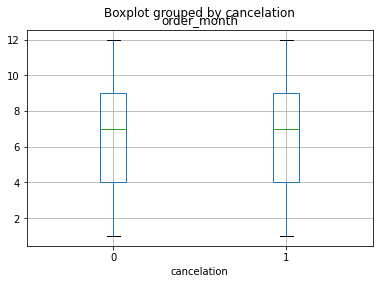

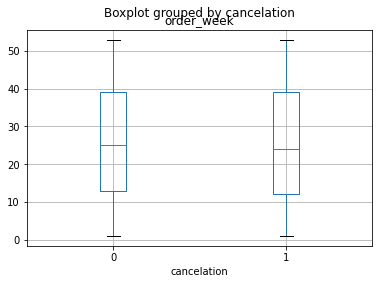

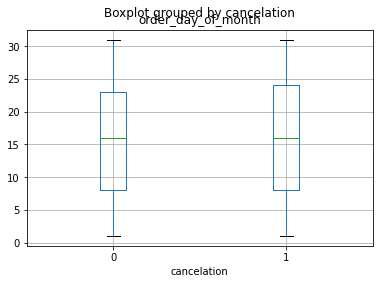

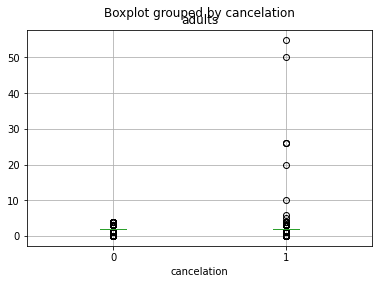

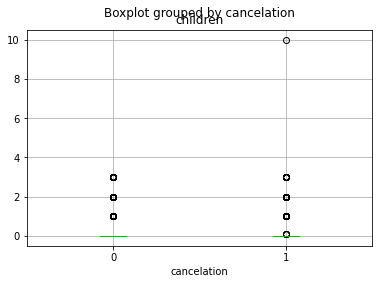

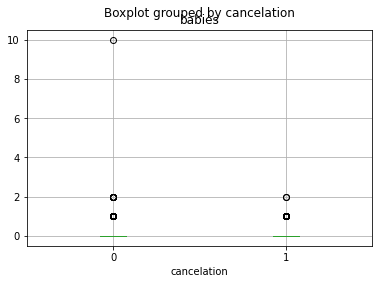

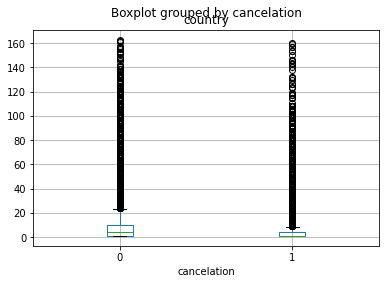

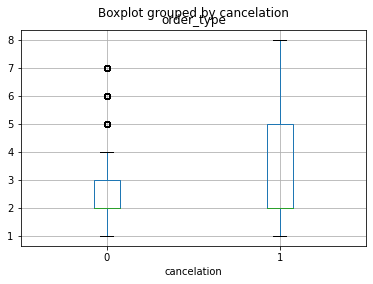

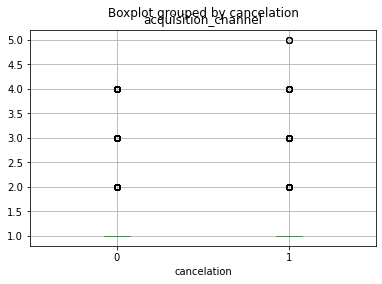

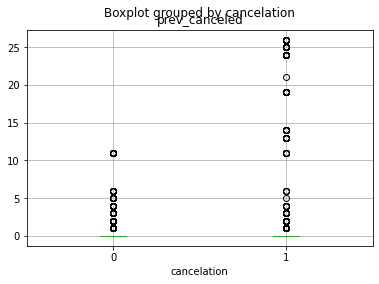

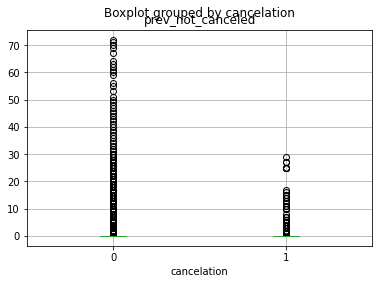

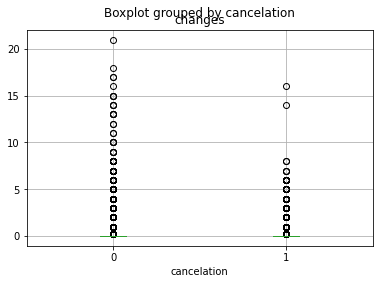

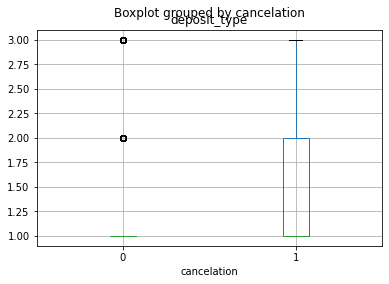

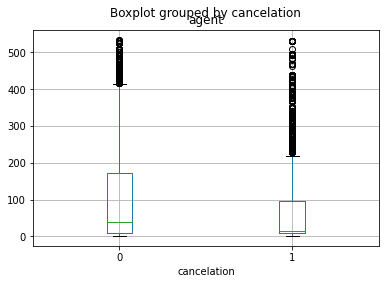

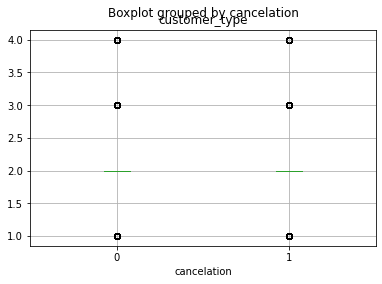

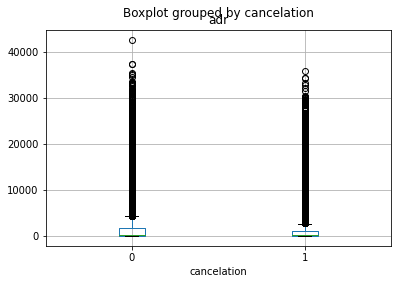

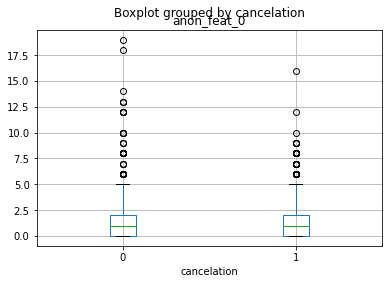

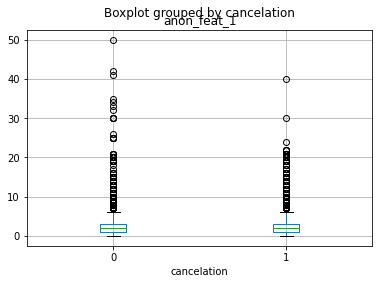

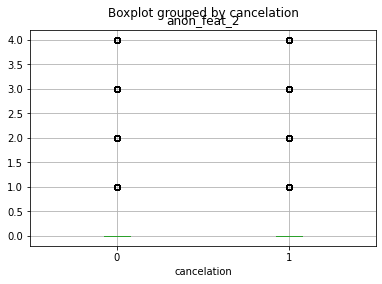

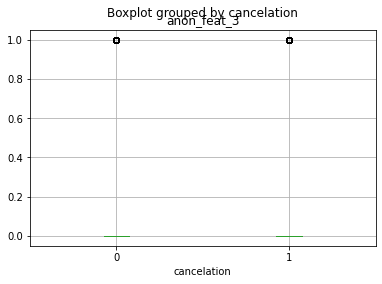

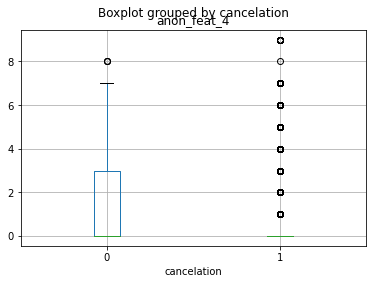

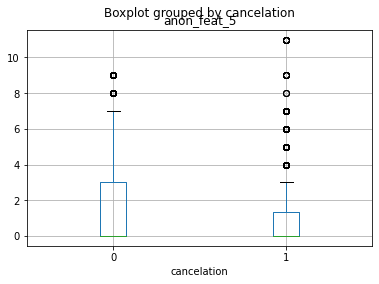

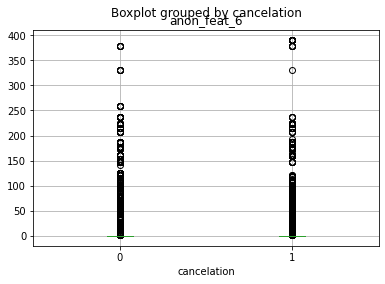

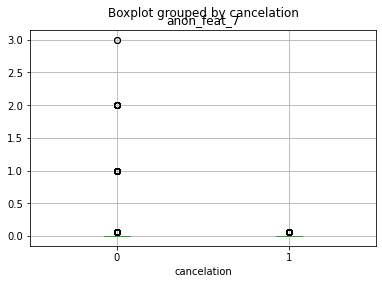

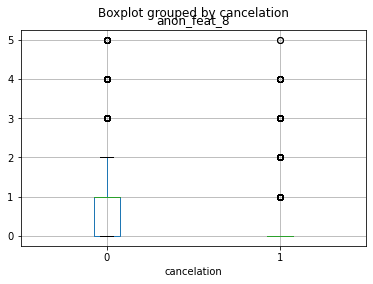

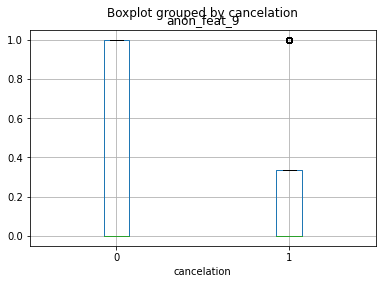

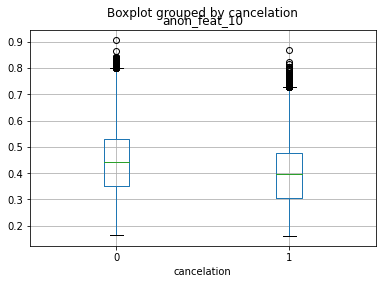

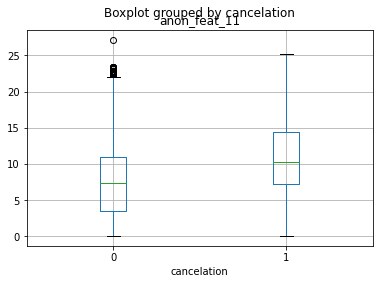

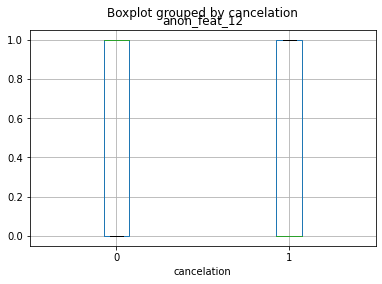

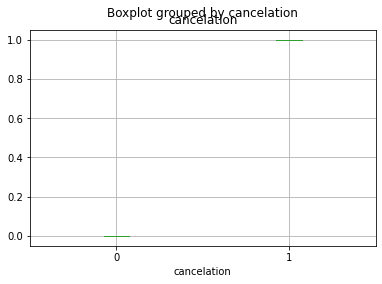

In [183]:
for column in feature_data:
    feature_data.boxplot(column = column,by= "cancelation")
    plt.show()    

from a look at those boxplots we can first see that there are many outliers that should be removed from the data, and second we can get an idea on which of the features have a big influence on the label, by look at how different are the values between an instance that the label is 1 and 0.

To get a better understanding of the contribution of each feature to the model, let's take a look on how all of the features are correlated with each other:

In [184]:
feature_cor = feature_data.corr(method='pearson').abs()
feature_cor.style.background_gradient(cmap='PuBu').set_precision(2)

,index,time_until_order,order_year,order_month,order_week,order_day_of_month,adults,children,babies,country,order_type,acquisition_channel,prev_canceled,prev_not_canceled,changes,deposit_type,agent,customer_type,adr,anon_feat_0,anon_feat_1,anon_feat_2,anon_feat_3,anon_feat_4,anon_feat_5,anon_feat_6,anon_feat_7,anon_feat_8,anon_feat_9,anon_feat_10,anon_feat_11,anon_feat_12,cancelation
index,1.00,0.01,0.30,0.05,0.00,0.01,0.01,0.02,0.03,0.14,0.08,0.08,0.02,0.00,0.00,0.04,0.57,0.03,0.02,0.15,0.21,0.04,0.02,0.16,0.19,0.01,0.13,0.11,0.80,0.01,0.00,0.00,0.24
time_until_order,0.01,1.00,0.04,0.12,0.01,0.00,0.11,0.04,0.02,0.06,0.12,0.20,0.08,0.07,0.00,0.33,0.06,0.10,0.01,0.08,0.15,0.00,0.12,0.10,0.15,0.16,0.10,0.09,0.07,0.44,0.87,0.00,0.27
order_year,0.30,0.04,1.00,0.51,0.01,0.00,0.03,0.05,0.01,0.10,0.06,0.02,0.12,0.03,0.03,0.06,0.06,0.06,0.02,0.02,0.03,0.07,0.01,0.09,0.03,0.05,0.01,0.11,0.03,0.04,0.05,0.00,0.01
order_month,0.05,0.12,0.51,1.00,0.05,0.02,0.03,0.01,0.01,0.02,0.03,0.01,0.04,0.02,0.01,0.00,0.03,0.00,0.06,0.02,0.02,0.01,0.03,0.01,0.00,0.02,0.00,0.03,0.00,0.06,0.12,0.00,0.01
order_week,0.00,0.01,0.01,0.05,1.00,0.02,0.01,0.03,0.01,0.02,0.01,0.03,0.01,0.00,0.02,0.02,0.02,0.03,0.02,0.00,0.02,0.01,0.00,0.01,0.01,0.05,0.01,0.04,0.02,0.02,0.02,0.01,0.02
order_day_of_month,0.01,0.00,0.00,0.02,0.02,1.00,0.00,0.02,0.00,0.00,0.01,0.01,0.02,0.00,0.01,0.00,0.00,0.01,0.04,0.01,0.03,0.01,0.01,0.02,0.01,0.02,0.01,0.00,0.00,0.01,0.01,0.00,0.01
adults,0.01,0.11,0.03,0.03,0.01,0.00,1.00,0.03,0.02,0.03,0.12,0.21,0.01,0.11,0.05,0.02,0.03,0.11,0.12,0.09,0.09,0.02,0.15,0.22,0.15,0.01,0.02,0.13,0.01,0.12,0.15,0.00,0.06
children,0.02,0.04,0.05,0.01,0.03,0.02,0.03,1.00,0.03,0.05,0.07,0.02,0.02,0.02,0.05,0.09,0.04,0.07,0.15,0.05,0.04,0.05,0.03,0.38,0.32,0.03,0.06,0.08,0.05,0.00,0.03,0.00,0.01
babies,0.03,0.02,0.01,0.01,0.01,0.00,0.02,0.03,1.00,0.01,0.01,0.01,0.01,0.01,0.08,0.03,0.03,0.02,0.02,0.02,0.02,0.00,0.01,0.04,0.04,0.01,0.03,0.10,0.04,0.01,0.02,0.01,0.03
country,0.14,0.06,0.10,0.02,0.02,0.00,0.03,0.05,0.01,1.00,0.12,0.06,0.04,0.04,0.04,0.17,0.06,0.01,0.08,0.05,0.04,0.03,0.07,0.07,0.05,0.03,0.02,0.10,0.09,0.00,0.05,0.00,0.12


## Feature Selection
<a id= 'reduce'></a>

In [185]:
# Drop feature with low-to-none(<=0.1) correlation with the label:
columns_list = (feature_data.columns).tolist()
cancelation_cor = feature_cor['cancelation'].tolist()
columns_num = len(columns_list)

lst=[]
for i in range(columns_num):
    if cancelation_cor[i] <= 0.1:
        feature_data = feature_data.drop(columns_list[i],axis=1)
        lst.append(columns_list[i])
feature_data.columns

Index(['index', 'time_until_order', 'country', 'order_type',
       'acquisition_channel', 'prev_canceled', 'changes', 'deposit_type',
       'anon_feat_5', 'anon_feat_7', 'anon_feat_8', 'anon_feat_9',
       'anon_feat_10', 'anon_feat_11', 'cancelation'],
      dtype='object')

In [186]:
#From the above correlation matrix we can see that anon_feat_11 and time_until_order are highly correlated(0.87) with each other so we will merge them.
#(did not use it evntually because those features was dropped before due to low correlation with the label)
#feature_data['feat11_time_until_order'] = feature_data[['anon_feat_11', 'time_until_order']].mean(axis=1)

# Remove due to prior merge:
#feature_data.drop('anon_feat_11', axis=1, inplace=True)
#feature_data.drop('time_until_order', axis=1, inplace=True)

feature_data

,index,time_until_order,country,order_type,acquisition_channel,prev_canceled,changes,deposit_type,anon_feat_5,anon_feat_7,anon_feat_8,anon_feat_9,anon_feat_10,anon_feat_11,cancelation
0,51014,309.000000,1,1,1,0,0.0,1,0.0,0.0,0,0.0,0.250606,17.588299,1
1,28536,3.000000,2,2,1,0,0.0,1,3.0,1.0,1,1.0,0.444719,2.343371,0
2,21745,103.673879,3,3,2,0,0.0,1,4.0,0.0,0,1.0,0.598733,2.498820,0
3,17502,153.000000,4,1,1,0,1.0,1,3.0,0.0,0,1.0,0.335675,12.411559,0
4,83295,33.000000,5,4,3,0,1.0,1,0.0,0.0,0,0.0,0.492874,5.743378,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89537,112553,21.000000,28,2,1,0,0.0,1,0.0,0.0,1,0.0,0.321296,4.663834,0
89538,87372,90.000000,3,2,1,0,0.0,1,0.0,0.0,1,0.0,0.398224,9.486275,0
89539,16490,39.000000,1,2,1,0,0.0,1,0.0,0.0,1,1.0,0.387626,6.245419,0
89540,1185,110.000000,1,2,1,0,0.0,1,0.0,0.0,1,1.0,0.323147,10.411280,1


# Preprocessing
<a id= 'pre'></a>

## Removing Outliers
<a id= 'outlier'></a>

We will remove outliers by calculating the z-score of each value and checking if it's absolute value is lower than 4. If so- we will keep it, and if not we will remove it.

In [187]:
#assign the data without outliers to new_df:
new_df = feature_data[feature_data.apply(lambda x: np.abs(x - x.mean()) / x.std() < 4).all(axis=1)]
new_df

,index,time_until_order,country,order_type,acquisition_channel,prev_canceled,changes,deposit_type,anon_feat_5,anon_feat_7,anon_feat_8,anon_feat_9,anon_feat_10,anon_feat_11,cancelation
0,51014,309.000000,1,1,1,0,0.0,1,0.0,0.0,0,0.0,0.250606,17.588299,1
1,28536,3.000000,2,2,1,0,0.0,1,3.0,1.0,1,1.0,0.444719,2.343371,0
2,21745,103.673879,3,3,2,0,0.0,1,4.0,0.0,0,1.0,0.598733,2.498820,0
3,17502,153.000000,4,1,1,0,1.0,1,3.0,0.0,0,1.0,0.335675,12.411559,0
4,83295,33.000000,5,4,3,0,1.0,1,0.0,0.0,0,0.0,0.492874,5.743378,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89537,112553,21.000000,28,2,1,0,0.0,1,0.0,0.0,1,0.0,0.321296,4.663834,0
89538,87372,90.000000,3,2,1,0,0.0,1,0.0,0.0,1,0.0,0.398224,9.486275,0
89539,16490,39.000000,1,2,1,0,0.0,1,0.0,0.0,1,1.0,0.387626,6.245419,0
89540,1185,110.000000,1,2,1,0,0.0,1,0.0,0.0,1,1.0,0.323147,10.411280,1


## Normalization of the Dataset
<a id= 'normal'></a>

I am going to use two approaches for normalize the data. First I am going to use StandardScaler() and second I will use MinMaxScaler(). I will use those two approaches since every model gives better results with different kinds of datasets.

In [188]:
#create a copy of the data so we can manipulate it
new_df_copy = new_df.copy()
#pop cancelation column from it and assign it to a new variable:
cancelation_label = new_df_copy.pop('cancelation')

In [189]:
# Normalize the data so it will have mean 0 and std 1 using StandardScaler():
standard_scaler = StandardScaler()
scaled1 = standard_scaler.fit_transform(new_df_copy)
new_data_scaled1 = pd.DataFrame(scaled1, columns=new_df_copy.columns)
new_data_scaled1.describe()

,index,time_until_order,country,order_type,acquisition_channel,prev_canceled,changes,deposit_type,anon_feat_5,anon_feat_7,anon_feat_8,anon_feat_9,anon_feat_10,anon_feat_11
count,8.595300e+04,8.595300e+04,8.595300e+04,8.595300e+04,8.595300e+04,8.595300e+04,8.595300e+04,8.595300e+04,8.595300e+04,8.595300e+04,8.595300e+04,8.595300e+04,8.595300e+04,8.595300e+04
mean,1.099463e-17,-5.621317e-18,-7.158913e-17,1.653329e-18,-1.063917e-16,-1.752528e-17,2.298127e-17,-1.507836e-16,1.014317e-16,-7.125846e-17,-1.777328e-17,-1.094503e-16,-1.996808e-16,3.352124e-17
std,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00
min,-1.728408e+00,-1.070506e+00,-6.050394e-01,-1.106834e+00,-4.314287e-01,-2.321669e-01,-3.901880e-01,-3.529631e-01,-7.283313e-01,-2.627473e-01,-7.289697e-01,-7.266000e-01,-2.104295e+00,-1.744923e+00
25%,-8.651903e-01,-8.087419e-01,-6.050394e-01,-3.759035e-01,-4.314287e-01,-2.321669e-01,-3.901880e-01,-3.529631e-01,-7.283313e-01,-2.627473e-01,-7.289697e-01,-7.266000e-01,-7.590063e-01,-8.168015e-01
50%,-2.407840e-03,-9.674232e-02,-4.939893e-01,-3.759035e-01,-4.314287e-01,-2.321669e-01,-3.901880e-01,-3.529631e-01,-7.283313e-01,-2.627473e-01,-7.289697e-01,-7.266000e-01,-7.597681e-04,6.926090e-03
75%,8.628133e-01,3.953751e-01,1.723108e-01,3.550266e-01,-4.314287e-01,-2.321669e-01,-3.901880e-01,-3.529631e-01,9.432410e-01,-2.627473e-01,5.747304e-01,1.435884e+00,6.433989e-01,7.168311e-01
max,1.737528e+00,4.122902e+00,5.724812e+00,3.278747e+00,3.294528e+00,1.213435e+01,4.105988e+00,2.833157e+00,3.729195e+00,3.997418e+00,3.182131e+00,1.435884e+00,3.810383e+00,3.227882e+00


In [190]:
# scaling data to values in range 0 to 1 using MinMaxScaler():
min_max_scaler = MinMaxScaler()
scaled2 = min_max_scaler.fit_transform(new_df_copy)
new_data_scaled2 = pd.DataFrame(min_max_scaler.transform(new_df_copy), columns=new_df_copy.columns)
new_data_scaled2.describe()

,index,time_until_order,country,order_type,acquisition_channel,prev_canceled,changes,deposit_type,anon_feat_5,anon_feat_7,anon_feat_8,anon_feat_9,anon_feat_10,anon_feat_11
count,85953.000000,85953.000000,85953.000000,85953.000000,85953.000000,85953.000000,85953.000000,85953.000000,85953.000000,85953.000000,85953.000000,85953.000000,85953.000000,85953.000000
mean,0.498684,0.206128,0.095585,0.252380,0.115790,0.018774,0.086782,0.110781,0.163394,0.061675,0.186385,0.336002,0.355775,0.350893
std,0.288524,0.192553,0.157983,0.228021,0.268389,0.080864,0.222413,0.313863,0.224341,0.234734,0.255684,0.462434,0.169072,0.201095
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249058,0.050403,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.227449,0.186639
50%,0.497990,0.187500,0.017544,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355647,0.352286
75%,0.747625,0.282258,0.122807,0.333333,0.000000,0.000000,0.000000,0.000000,0.375000,0.000000,0.333333,1.000000,0.464555,0.495043
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Principal Component Analysis 
<a id= 'pca'></a>

Now I will run PCA on both of the data sets, the normalized one and the scaled one, to reduce their dimension to 2.

In [191]:
# PCA for the normalized dataset:
pca1 = PCA(n_components=2)
X_new1 = pca1.fit_transform(new_data_scaled1)

print('Shape of the PCA Data:',X_new1.shape)
print('Explained Variance Ratio:',pca1.explained_variance_ratio_.sum())
print('PCA Components:',pca1.components_)

data_pca1 = pd.DataFrame(data = X_new1, columns = ['A', 'B'])

Shape of the PCA Data: (85953, 2)
Explained Variance Ratio: 0.34782035012256957
PCA Components: [[ 0.15051526  0.47194401 -0.0626934   0.0863203  -0.20336946  0.21470276
  -0.07345777  0.34019742 -0.25072788 -0.1815642  -0.12862805 -0.24200457
  -0.35385225  0.48835722]
 [-0.56158454  0.15763102 -0.29847664  0.29619253  0.23439739  0.12559089
   0.04121612  0.19042369  0.14178384  0.15770202 -0.21336824  0.51213952
  -0.05280873  0.13677553]]


In [192]:
# PCA for the scaled (0-1) dataset:
pca2 = PCA(n_components=2)
X_new2 = pca2.fit_transform(new_data_scaled2)

print('Shape of the PCA Data:',X_new2.shape)
print('Explained Variance Ratio:',pca2.explained_variance_ratio_.sum())
print('PCA Components:',pca2.components_)

data_pca2 = pd.DataFrame(data = X_new2, columns = ['A', 'B'])

Shape of the PCA Data: (85953, 2)
Explained Variance Ratio: 0.4884355892577018
PCA Components: [[-0.45572962 -0.05556369 -0.03109394  0.00764807  0.11447742 -0.01821242
   0.03704842 -0.13677213  0.15929329  0.11657329  0.02028322  0.84240071
   0.04058953 -0.0634061 ]
 [-0.22876222  0.30145684 -0.12222428  0.23233491 -0.06800064  0.06445924
  -0.08178467  0.7084872  -0.1669966  -0.09423588 -0.31380195  0.10231189
  -0.15637701  0.31668595]]


## Preprocessing of the test dataset
<a id= 'testpre'></a>

Now I will apply most of the preprocessing steps that I used on the train data, on the test data. 

In [193]:
# Loading the test dataset:
test_df = pd.read_csv("./feature_data_test.csv", index_col=0)
test_df = test_df.reset_index()
test_df = pd.DataFrame(data=test_df)

test_df

,index,time_until_order,order_year,order_month,order_week,order_day_of_month,adults,children,babies,country,...,anon_feat_4,anon_feat_5,anon_feat_6,anon_feat_7,anon_feat_8,anon_feat_9,anon_feat_10,anon_feat_11,anon_feat_12,anon_feat_13
0,22167,2.0,2016,March,week_12,19,1,0.0,0,PRT,...,3,3.0,0.0,NaN,0,1.0,0.737167,1.770881,True,NaN
1,11664,462.0,2017,May,week_21,25,2,0.0,0,PRT,...,0,0.0,0.0,0.0,0,1.0,0.194943,21.511707,False,NaN
2,43471,74.0,2015,September,week_38,18,2,0.0,0,PRT,...,0,0.0,0.0,0.0,0,0.0,0.442849,8.763037,True,NaN
3,7697,NaN,2016,August,week_35,21,3,1.0,0,ITA,...,7,7.0,0.0,0.0,0,1.0,0.432131,NaN,True,NaN
4,106026,25.0,2017,February,week_7,12,2,0.0,0,DEU,...,3,3.0,0.0,0.0,0,0.0,0.552624,5.029345,True,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29843,85122,0.0,2016,March,week_10,2,1,0.0,0,GNB,...,0,NaN,0.0,0.0,0,0.0,0.480528,1.593152,False,NaN
29844,80166,NaN,2016,March,week_11,12,2,0.0,0,PRT,...,0,0.0,0.0,0.0,1,0.0,NaN,11.359328,False,NaN
29845,107905,62.0,2017,March,week_11,18,2,0.0,0,BEL,...,0,0.0,0.0,0.0,1,0.0,0.294034,7.909101,False,NaN
29846,78430,8.0,2015,October,week_41,4,2,0.0,0,BRA,...,0,0.0,0.0,0.0,3,0.0,0.575645,3.020069,False,NaN


In [194]:
#drop features with high percentage of missing values from the data:
test_df = test_df.drop(['anon_feat_13','company'],axis=1)

#Filling missing values with the most frequent value in features that don't contain numbers:
object_column = test_df.select_dtypes(include = object).columns.tolist()
for column in object_column:
    test_df[column].fillna(test_df[column].value_counts().idxmax(), inplace=True)

#Filling missing values with the mean of the column for features with numeric values:
test_df = test_df.fillna(test_df.mean())

#Convert alphabets to numeric:
#anon_feat_12
test_df['anon_feat_12'] = test_df['anon_feat_12'].astype(int)

#deposit_type
test_df['deposit_type'] = test_df['deposit_type'].replace(['No Deposit','Non Refund','Refundable'],[1,2,3])

#order_week
test_df['order_week'] = test_df['order_week'].replace(['week_20', 'week_41', 'week_12', 'week_40', 'week_5', 'week_19','week_11', 'week_33', 'week_44', 'week_39', 'week_13', 'week_25',
'week_10', 'week_15', 'week_7', 'week_18', 'week_35', 'week_49','week_16', 'week_42', 'week_29', 'week_52', 'week_28', 'week_38','week_21', 'week_3', 'week_26', 'week_8', 'week_50', 'week_23',
'week_47', 'week_6', 'week_43', 'week_31', 'week_30', 'week_37','week_45', 'week_14', 'week_27', 'week_34', 'week_53', 'week_32','week_24', 'week_4', 'week_36', 'week_46', 'week_17', 'week_9','week_48', 'week_1', 'week_22', 'week_51', 'week_2'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53])

#order_month
test_df['order_month'] = test_df['order_month'].replace(['January','February', 'March','April','May', 'June','July' , 'August',
    'September', 'October', 'November', 'December'],[1,2,3,4,5,6,7,8,9,10,11,12])
      
#country
test_df['country']= test_df['country'].replace(['PRT', 'ITA' ,'DEU' ,'FRA', 'SWE' ,'CN' ,'ESP' ,'GBR' ,'USA', 'ROU', 'SRB', 'BEL'
,'NLD' ,'ISR', 'POL','RUS' ,'DNK' ,'IRL', 'BGR' ,'CHN', 'BRA' ,'FIN' ,'CHE', 'ZAF',
'TUR', 'HRV' ,'CPV', 'NOR', 'AUT' ,'MAR', 'HUN', 'LUX', 'JPN', 'ISL', 'BLR', 'LVA',
'AGO', 'THA' ,'KOR' ,'BEN', 'BRB', 'SEN', 'MEX' ,'KEN' ,'PRY', 'AUS' ,'MDV', 'ARE',
 'ECU', 'IRN', 'ARG', 'TWN', 'NZL', 'KNA', 'SVK' ,'HKG', 'URY', 'DZA' ,'JOR' ,'CYP',
 'PHL' ,'CRI' ,'NGA', 'TZA' ,'CHL' ,'GLP' ,'COL', 'LTU' ,'EST' ,'IND', 'UKR' ,'GRC',
 'CZE' ,'GHA' ,'LBN', 'EGY' ,'OMN' ,'FRO', 'SGP' ,'SAU', 'MYS', 'VEN' ,'ALB', 'AND',
 'AZE' ,'KWT', 'KIR' ,'PRI', 'UZB' ,'TUN' ,'MLT', 'TJK', 'ETH' ,'SVN', 'MLI', 'IRQ',
 'DOM', 'GIB', 'BGD' ,'GEO', 'MOZ', 'UGA', 'IDN', 'BIH' ,'SLV','PAN' ,'PAK', 'QAT',
 'STP', 'PER' ,'KAZ', 'CUB', 'ARM' ,'VNM', 'LBY', 'MUS', 'CMR' ,'NPL', 'LIE', 'GNB',
 'CYM' ,'CAF', 'DMA' ,'GAB', 'BOL', 'JEY', 'MNE', 'NCL', 'MAC' ,'TMP' ,'MCO', 'AIA',
 'SYR', 'BHS', 'BHR', 'JAM', 'SUR', 'LKA' ,'CIV'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,
 55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89, 90,91,92,
93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,
126,127,128,129,130,131,132,133,134,135,136,137,138,139])

#customer_type
test_df['customer_type'] = test_df['customer_type'].replace(['Transient-Party', 'Transient', 'Contract', 'Group'],[1,2,3,4])

#acquisition_channel
test_df['acquisition_channel'] = test_df['acquisition_channel'].replace(['TA/TO', 'Direct', 'Corporate', 'GDS', 'Undefined'],
[1,2,3,4,5])

#order_type
test_df['order_type'] = test_df['order_type'].replace(['Offline TA/TO', 'Online TA', 'Direct', 'Corporate', 'Groups',
'Aviation', 'Complementary', 'Undefined'],
[1,2,3,4,5,6,7,8])

#test_df = pd.get_dummies(test_df,columns = ['acquisition_channel', 'customer_type','deposit_type','order_type'])

# Replacing value "unknown" with NaN:
test_df.replace(r'\N', np.nan, inplace = True)

# Drop feature with low-to-none(<=0.1) correlation with the label:
test_df = test_df.drop(lst,axis=1)

#(eventually this part was not needed because those features was dropped before due to low correlation with the label)
# Merge features that are highly correlated with each other:
#test_df['feat11_time_until_order'] = test_df[['anon_feat_11', 'time_until_order']].mean(axis=1)

# Remove due to prior merge:
#test_df.drop('anon_feat_11', axis=1, inplace=True)
#test_df.drop('time_until_order', axis=1, inplace=True)

#Standard normalization of the test data without PCA(this is the data normalization that gave the best results for Desicion Tree model which I chose to use):
standard_test_df = standard_scaler.fit_transform(test_df)
standard_test = pd.DataFrame(standard_test_df, columns=test_df.columns)


test_df


,index,time_until_order,country,order_type,acquisition_channel,prev_canceled,changes,deposit_type,anon_feat_5,anon_feat_7,anon_feat_8,anon_feat_9,anon_feat_10,anon_feat_11
0,22167,2.000000,1,1,1,0,0.000000,1,3.000000,0.06257,0,1.0,0.737167,1.770881
1,11664,462.000000,1,5,1,0,0.000000,2,0.000000,0.00000,0,1.0,0.194943,21.511707
2,43471,74.000000,1,1,1,0,0.215106,1,0.000000,0.00000,0,0.0,0.442849,8.763037
3,7697,104.943231,2,2,1,0,0.215106,1,7.000000,0.00000,0,1.0,0.432131,8.918460
4,106026,25.000000,3,1,1,0,0.000000,1,3.000000,0.00000,0,0.0,0.552624,5.029345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29843,85122,0.000000,120,3,2,0,0.000000,1,1.318185,0.00000,0,0.0,0.480528,1.593152
29844,80166,104.943231,1,2,1,1,0.000000,1,0.000000,0.00000,1,0.0,0.425578,11.359328
29845,107905,62.000000,12,2,1,0,0.000000,1,0.000000,0.00000,1,0.0,0.294034,7.909101
29846,78430,8.000000,21,2,1,0,0.000000,1,0.000000,0.00000,3,0.0,0.575645,3.020069


# Models
<a id= 'models'></a>

## Splitting the Data into train and test
<a id= 'split'></a>

I splitted the data to train and test for every dataset.

In [195]:
# Splitting the normalized + PCA dataset:
X_train1, X_test1, y_train1, y_test1 = train_test_split(data_pca1, cancelation_label, test_size=0.33,shuffle=False,random_state=42)

# Splitting the scaled (0-1) + PCA dataset:
X_train2, X_test2, y_train2, y_test2 = train_test_split(data_pca2, cancelation_label, test_size=0.33,shuffle=False,random_state=42)

# Splitting the normalized dataset:
X_train3, X_test3, y_train3, y_test3 = train_test_split(new_data_scaled1, cancelation_label, test_size=0.33,shuffle=False,random_state=42)

# Splitting the scaled (0-1) dataset:
X_train4, X_test4, y_train4, y_test4 = train_test_split(new_data_scaled2, cancelation_label, test_size=0.33,shuffle=False,random_state=42)

Now I will run the models I chosed to use. For each model, I checked which are the best parameters and what are the test and train accuracy. The train accurasy is an indicator for how good the model would be able to predict the cancelation label. I also decided to print the train accuracy to get a clue of whether my model is overfitted. If the difference between them was over 0.05, it means the model is overfitted. as you can see below, none of my chosen models  is overfitted.

## K-Nearest Neighbors
<a id= 'knn'></a>

In [196]:
# Finding the best parameters for KNN:
parametersOptions = {'n_neighbors': [3, 5 ,10, 15, 20, 40, 60, 80, 100],
                   'weights': ['uniform', 'distance'],
                   'metric': ['euclidean', 'manhattan']}
knn_gridsearch = GridSearchCV(KNeighborsClassifier(), parametersOptions, cv=3, scoring = 'roc_auc')
knn_gridsearch.fit(X_train1, y_train1)

print('KNN Best Parameters: {}'.format(knn_gridsearch.best_params_))
print('KNN Score with the Best Parameters: {}'.format(knn_gridsearch.best_score_))

KNN Best Parameters: {'metric': 'manhattan', 'n_neighbors': 100, 'weights': 'uniform'}
KNN Score with the Best Parameters: 0.8497810899103392


In [197]:
# Running the model:
knn = KNeighborsClassifier(**knn_gridsearch.best_params_)
knn.fit(X_train1, y_train1)
c_matrix = knn.predict(X_test1)
print('---Accuracy of K-Nearest Neighbors---\n')
print('Test:', knn.score(X_test1, y_test1))
print('Train:', knn.score(X_train1, y_train1))

---Accuracy of K-Nearest Neighbors---

Test: 0.7855103120042306
Train: 0.785962353268042


## Logistic Regression
<a id= 'logistic'></a>

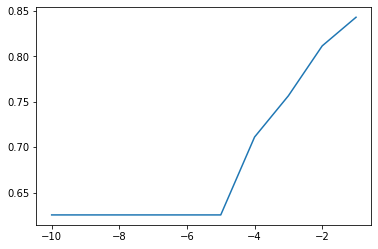

The Optimal C for Logistic Regression: 0.1


In [198]:
# Finding the best parameters for Logistic Regression:
powers = range(-10,0)
Cs = [10**p for p in powers]
c_score = []

for c in Cs:
    LR = LogisticRegression(penalty="l2", solver = "liblinear", C=c, tol=0.0001, max_iter=100)
    LR.fit(X_train4, y_train4)
    c_score.append(LR.score(X_test4, y_test4))

plt.plot(powers, c_score)
plt.show()
    
optimal_c = Cs[c_score.index(max(c_score))]
print("The Optimal C for Logistic Regression:", optimal_c)

In [199]:
# Running the Model:
logistic_reg = LogisticRegression(penalty="l2", C=optimal_c, tol=0.0001, max_iter=100) 
logistic_reg.fit(X_train4, y_train4)
y_pred_logistic = logistic_reg.predict(X_test4)
print('---Accuracy of Logistic Regression---\n')
print('Test:', logistic_reg.score(X_test4, y_test4))
print('Train:', logistic_reg.score(X_train4, y_train4))

---Accuracy of Logistic Regression---

Test: 0.8451260356072625
Train: 0.8438216295061471


## Decision Tree
<a id= 'tree'></a>

In [128]:
#I put this code section in a comment because performing gridSearch is taking more than two hours to run. I entered manually the best parameters into the DecisionTreeClassifier(),but I left the output of the best parameters that was found by gridSearch. 
#Finding the best parameters for Decision Tree:
#parametersOptions = {'max_depth': [2, 4, 6, 8], 'criterion' :['gini', 'entropy'],
#                     'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4], 'min_samples_leaf': [1,2,4,5,10,20,30,40,80,100],}
#grid_search = GridSearchCV(DecisionTreeClassifier(), parametersOptions, cv=3, scoring = 'roc_auc')
#grid_search.fit(X_train3, y_train3)

#print('Decision Tree Best Parameters:\n{}'.format(grid_search.best_params_))
#print('Decision Tree Score with the Best Parameters: {}', grid_search.best_score_)

Decision Tree Best Parameters:
{'criterion': 'entropy', 'max_depth': 8, 'max_leaf_nodes': 56, 'min_samples_leaf': 30, 'min_samples_split': 2}
Decision Tree Score with the Best Parameters: {} 0.9949864650919444


In [200]:
# Running the Model:
#DT = DecisionTreeClassifier(**grid_search.best_params_)
#Here you can see the hyper parameters that was found by using gridSearch:
DT = DecisionTreeClassifier(criterion='entropy', max_depth= 8, max_leaf_nodes= 56, min_samples_leaf=30, min_samples_split= 4)
DT.fit(X_train3, y_train3)
y_pred_DT= DT.predict(X_test3)
y_train_score_DT=DT.predict(X_train3)
print('---Accuracy of Decision Tree---\n')
print('Test:',DT.score(X_test3, y_test3))
print('Train:', DT.score(X_train3, y_train3))

---Accuracy of Decision Tree---

Test: 0.966120218579235
Train: 0.9642981176634021


## Random Forest
<a id= 'forest'></a>

In [201]:
# Finding Best Parameters for Random Forest:

RF = RandomForestClassifier()
parameters =  {'max_depth': [2,4,6,8], 'max_features': ['auto', 'sqrt', 'log2'],
               'n_estimators': [50,200], 'criterion' :['gini', 'entropy']}
grid_object = GridSearchCV(estimator=RF, param_grid=parameters, scoring='roc_auc')
grid_object.fit(X_train3, y_train3)
print('Random Forest Best Parameters:\n{}'.format(grid_object.best_params_))
print('Random Forest Score with the Best Parameters: {}', grid_object.best_score_)

Random Forest Best Parameters:
{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}
Random Forest Score with the Best Parameters: {} 0.9902996580019746


In [203]:
# Running the Model:

RF = RandomForestClassifier(**grid_object.best_params_)
RF.fit(X_train3, y_train3)
RF_predict = RF.predict(X_test3)
print('---Accuracy of Random Forest---\n')
print('Test:',RF.score(X_test3, y_test3))
print('Train:', RF.score(X_train3, y_train3))

---Accuracy of Random Forest---

Test: 0.9574828133262824
Train: 0.9575779676321455


We can see that the best results are given by using the decision tree model that has the highest accuracy test rate. 

# Model's Evaluation
<a id= 'evaluation'></a>

## Confusion Matrix
<a id= 'matrix'></a>

The model I chose to evaluate through Confusion Matrix is the one that gave the best results- Decision Tree, so I will apply Confusion Matrix on this model. 

[[16944   796]
 [  165 10460]]


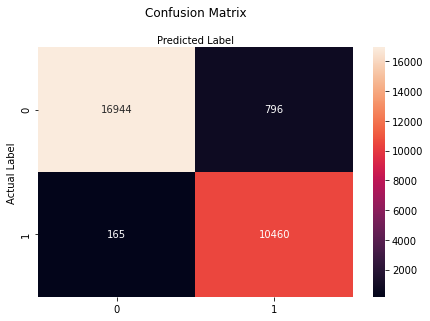

In [204]:
# Creating a confusion matrix:
cm = confusion_matrix(y_test3,y_pred_DT)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cm), annot=True ,fmt='g') #create heatmap
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
print(confusion_matrix(y_test3, y_pred_DT))

The confusion matrix gives evaluation of the Decision Tree model's performance in a visualized way, let's see what every cell in the above matrix means:

|   | Actual Positive | Actual Negative ||
| --- | --- | --- | --- |
| Predicted Positive | True Positive | False Positive | Total Predicted Positive
| Predicted Negative | False Negative | True Negative | Total Predicted Negative
| | Total Actual Positive| Total Actual Negative

True Positive - The number of times DT predicted an order that cancelled correctly.

False Positive - The number of times DT predicted that an order is going to be cancelled and it wasn't. 

True Negative - The number of times DT predicted correctly that an order is not going to be cancelled.

False Negative - The number of times DT predicted that an order is not going to be cancelled and it was.

## K-Fold Cross Validation
<a id= 'cross'></a>

In this project I will use 10- fold cross validtaion:

In [205]:
#preparing the data for k-fold by Setting X as the whole datasets and y as the label, without the columns name:
y = cancelation_label.values
X1 = data_pca1.values
X2  = data_pca2.values
X3 = new_data_scaled1.values
X4 = new_data_scaled2.values

In [206]:
def KfoldPlot(X, y, clf, k):
    clfname = str(clf)[:str(clf).find("(")]
    plt.figure()
    kf = KFold(n_splits=k, random_state=None, shuffle=False)
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    i=1
    for train_index, validation_index in kf.split(X):
        X_train2, X_validation = X[train_index], X[validation_index]
        y_train2, y_validation = y[train_index], y[validation_index]
        clf.fit(X_train2, y_train2)
        prob_prediction = clf.predict_proba(X_validation)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_validation, prob_prediction)
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        plt.plot(fpr, tpr, color='#D3D3D3')
        i+=1
    
    plt.plot([0], [0], color='#D3D3D3', linestyle='-', label='K-folds')    
    mean_tpr /= k
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
    plt.plot(mean_fpr, mean_tpr, color='red', linestyle='-', label='Mean ROC (area = %0.3f)' % mean_auc)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for ' + clfname)
    plt.legend(loc="lower right")
    plt.show()
    
    print('AUC Score: %.3f' % auc(fpr, tpr))

Now let's run the 10-fold CV on each of the models, and plot the result:

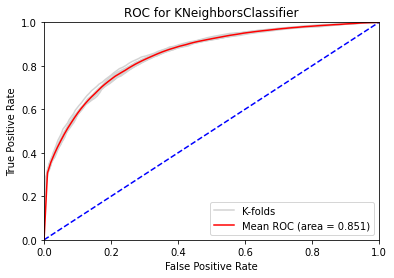

AUC Score: 0.855


In [207]:
#KNN:
KfoldPlot(X1, y, knn, 10)

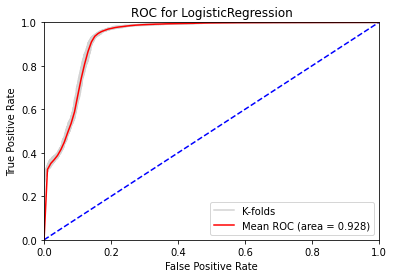

AUC Score: 0.930


In [208]:
#Logistic Regression:
KfoldPlot(X4, y, logistic_reg, 10)

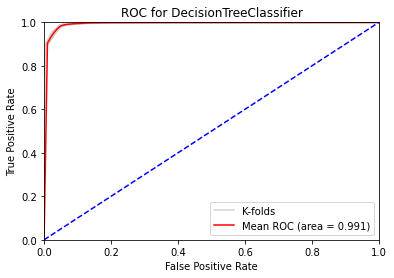

AUC Score: 0.996


In [209]:
#Decision Tree:
KfoldPlot(X3, y, DT, 10)

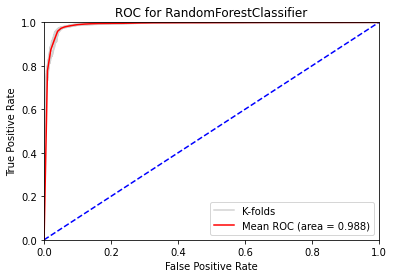

AUC Score: 0.990


In [210]:
#Random Forest:
KfoldPlot(X3, y, RF, 10)

As we can see, Decision Tree got the best AUC score-  0.996. This model also has the best test accuracy results, so I came to conclusion that this model is the best one to predict the label with.

# Making the Prediction
<a id= 'predict'></a>

Now I will make the prediction with the fitted model. I will fit the model to the train data that I used during the project, and then predict the probability of each order in the test set to be labeled as '1' (cancelled). 

In [211]:
# Initiating Decision Tree Classifier
#DT_test = DecisionTreeClassifier(**grid_search.best_params_)
#As I mentioned earlier I entered the hyper parameters manually:
DT_test = DecisionTreeClassifier(criterion='entropy', max_depth= 8, max_leaf_nodes= 56, min_samples_leaf=30, min_samples_split= 4)
DT_test.fit(new_data_scaled1, cancelation_label)

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_leaf_nodes=56,
                       min_samples_leaf=30, min_samples_split=4)

In [212]:
# Making the prediction:
test_prediction = DT_test.predict_proba(standard_test)
print(test_prediction)

[[9.98788776e-01 1.21122401e-03]
 [6.43707757e-04 9.99356292e-01]
 [9.53233256e-01 4.67667436e-02]
 ...
 [9.99717583e-01 2.82417494e-04]
 [9.96603261e-01 3.39673913e-03]
 [9.96603261e-01 3.39673913e-03]]


In [213]:
#Making a new dataframe from the prdictions:
final_prediction = pd.DataFrame(data = test_prediction[:, 1:])
final_prediction.columns = ['cancel_proba']
final_prediction

,cancel_proba
0,0.001211
1,0.999356
2,0.046767
3,0.977477
4,0.000282
...,...
29843,0.000282
29844,0.003397
29845,0.000282
29846,0.003397


In [214]:
#Exporting the predictions to CSV file:
final_prediction.to_csv("submission_group_30.csv")